In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import Table
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image,bar
import matplotlib.cm as cm  # Import colormap module
from matplotlib.colors import LinearSegmentedColormap

In [3]:
csv = "FILTROIEDO_ENG-Premier League_2024_TEAMS.csv"
df = pd.read_csv(csv)
df = df[["Time","Desarmes", "Desarmes Ganhos","Desarmes no Terço Final", "SCA DEF","GCA DEF","Eficiência","IEDO"]]

In [4]:
import re

def extrair_liga_temporada(nome_arquivo):
    padrao = r"FILTR[O0]IEDO_[A-Z]+-(?P<liga>[\w\s]+)_(?P<temporada>\d{4})"
    match = re.search(padrao, nome_arquivo)
    
    if match:
        liga = match.group("liga").replace("_", " ")
        temporada = match.group("temporada")
        return liga, temporada  # Retorna uma tupla (liga, temporada)
    
    return None, None

# Testando com seu exemplo
liga, temporada = extrair_liga_temporada(csv)


C:\Users\luizf\AppData\Local\Temp\ipykernel_13580\2555938692.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=normed_cmap(df["IEDO"],cmap=cm.get_cmap("RdYlGn"), num_stds=2.5)


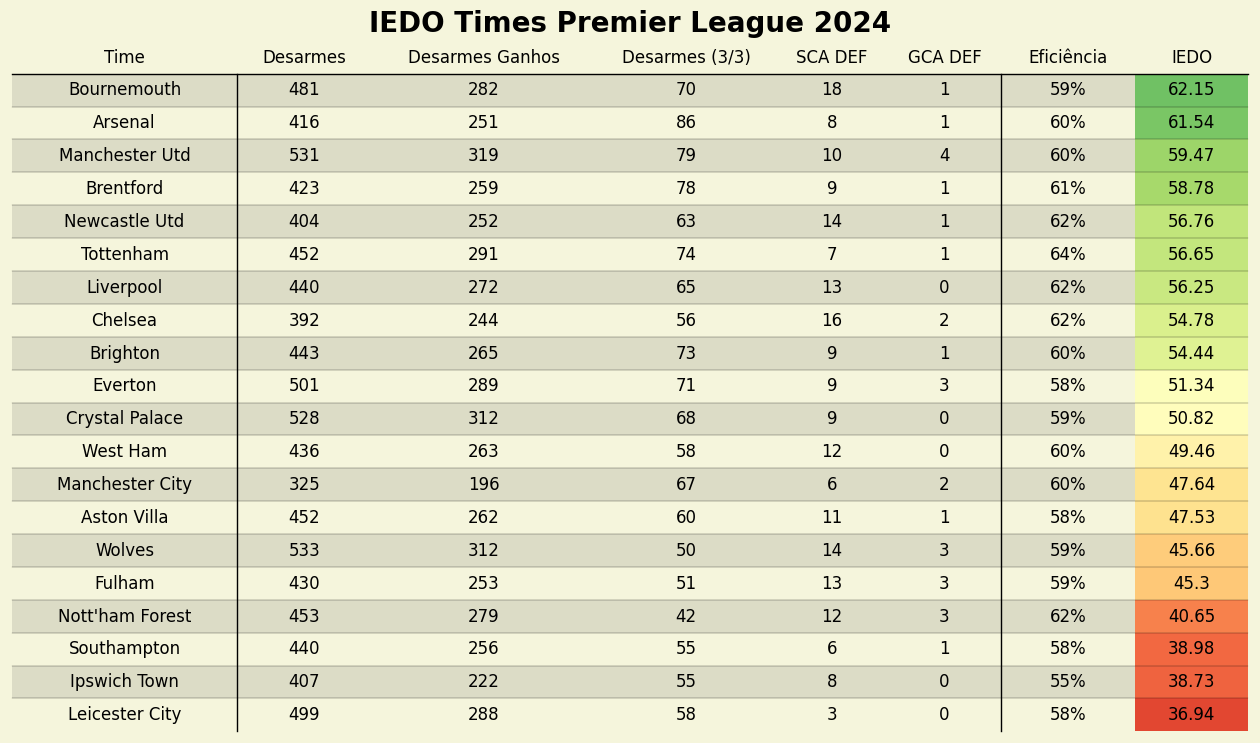

In [5]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.axis('tight')
ax.set_facecolor("#f5f5dc")  # Define a cor de fundo da tabela
ax.axis("off")

col_defs = [
    ColumnDefinition("Time", width=2.5,textprops={"ha": "center"},border="right"),

    ColumnDefinition("Desarmes", width=1.5,textprops={"ha": "center"}),
    ColumnDefinition("Desarmes Ganhos", width=2.5,textprops={"ha": "center"}),
    ColumnDefinition("Desarmes no Terço Final", width=2.0, title="Desarmes (3/3)",textprops={"ha": "center"}),
    ColumnDefinition("SCA DEF", width=1.25,textprops={"ha": "center"}),

    ColumnDefinition("GCA DEF", width=1.25,textprops={"ha": "center"},border="right"),
    ColumnDefinition("Eficiência", width=1.5,formatter=decimal_to_percent,textprops={"ha": "center"}),
    ColumnDefinition("IEDO", 
                      width=1.25,
                      textprops={"ha": "center"},  # Exibe os valores dentro de círculos
                            cmap=normed_cmap(df["IEDO"],cmap=cm.get_cmap("RdYlGn"), num_stds=2.5)
    ),
]

table = Table(df,
              column_definitions=col_defs,
              index_col = "Time",
              ax=ax,
              textprops={"fontsize": 12},
              col_label_divider = True,
              col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
              row_dividers=True,
              even_row_color="#DCDCC6"
              )

ax.set_title(("IEDO Times "+ liga+" "+ temporada),fontsize=20,fontweight="bold",ha='center')

nomeimg = "TabelaIEDOtimes" + liga + temporada
fig.set_facecolor("#f5f5dc")  # Define a cor de fundo da figura
plt.savefig(nomeimg,dpi=300, bbox_inches="tight")
plt.show()